# Problem statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

# Business Goal

- To model the demand of the company using available independent variables and find out which variables have the highest impact on the demand so that the company can use the model to understand the demand dynamics of the new market.

In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the data
data = pd.read_csv("day.csv")

In [3]:
#Checking the head of the data
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking the number of rows and columns
data.shape

(730, 16)

In [5]:
#Checking the type of variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking the descriptive statistics
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#Checking the number of null values in each column
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values in the data.Hence we can proceed with further analysis.

# Dropping unnecessary columns 


#### Since the first column "instant" indicates the record index,the column can be dropped.

In [8]:
#Dropping "instant" column
data.drop(["instant"],axis=1,inplace=True)

In [9]:
#Checking the head of the data
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### The date,month and year details are already present in the mnth,yr and weekday columns.Therefore the column dteday can be dropped.

In [10]:
#Dropping "dteday" column
data.drop(["dteday"],axis=1,inplace=True)

In [11]:
#Checking the head of the data
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### The cnt column represents the sum of the casual and registered users column.So these two columns become redundant variables and can be dropped.

In [12]:
#Dropping the casual and registered columns
data.drop(["casual","registered"],axis=1,inplace=True)

In [13]:
#Checking the head of the data
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:>

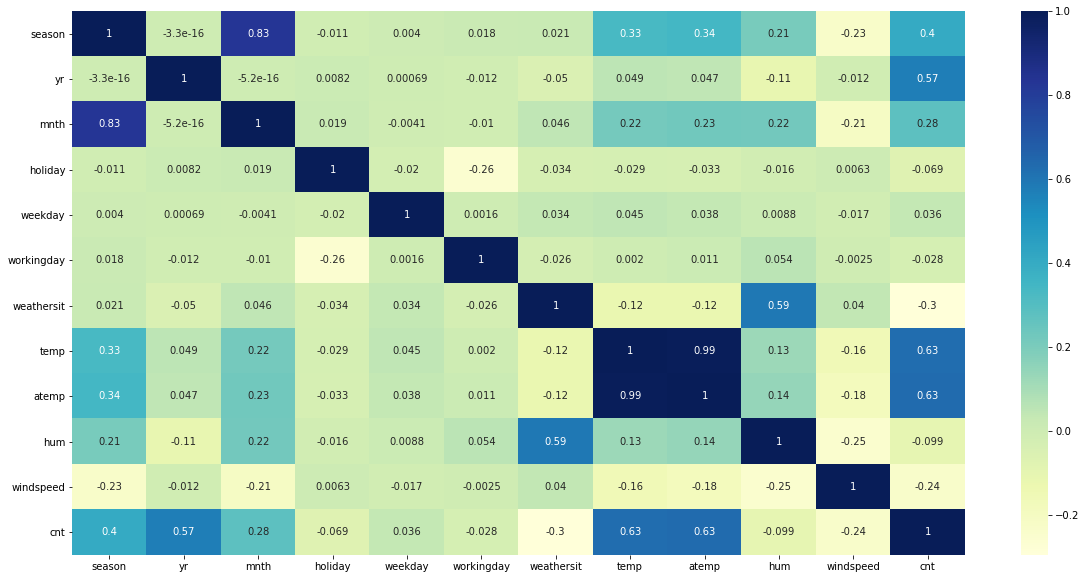

In [14]:
#Checking the correlation between the variables
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

#### From the heatmap we can see that the variables "temp" and "atemp" are highly correlated.Hence one of the variables must be removed as it may lead to multicollinearity if both are present.temp column represents the temperature in Celsius and atemp represents feeling temperature in Celsius.Since atemp may have higher impact on the target variable,the temp column can be dropped.

In [15]:
#Dropping the temp column
data.drop(["temp"],axis=1,inplace=True)

In [16]:
#Checking the head of the data
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


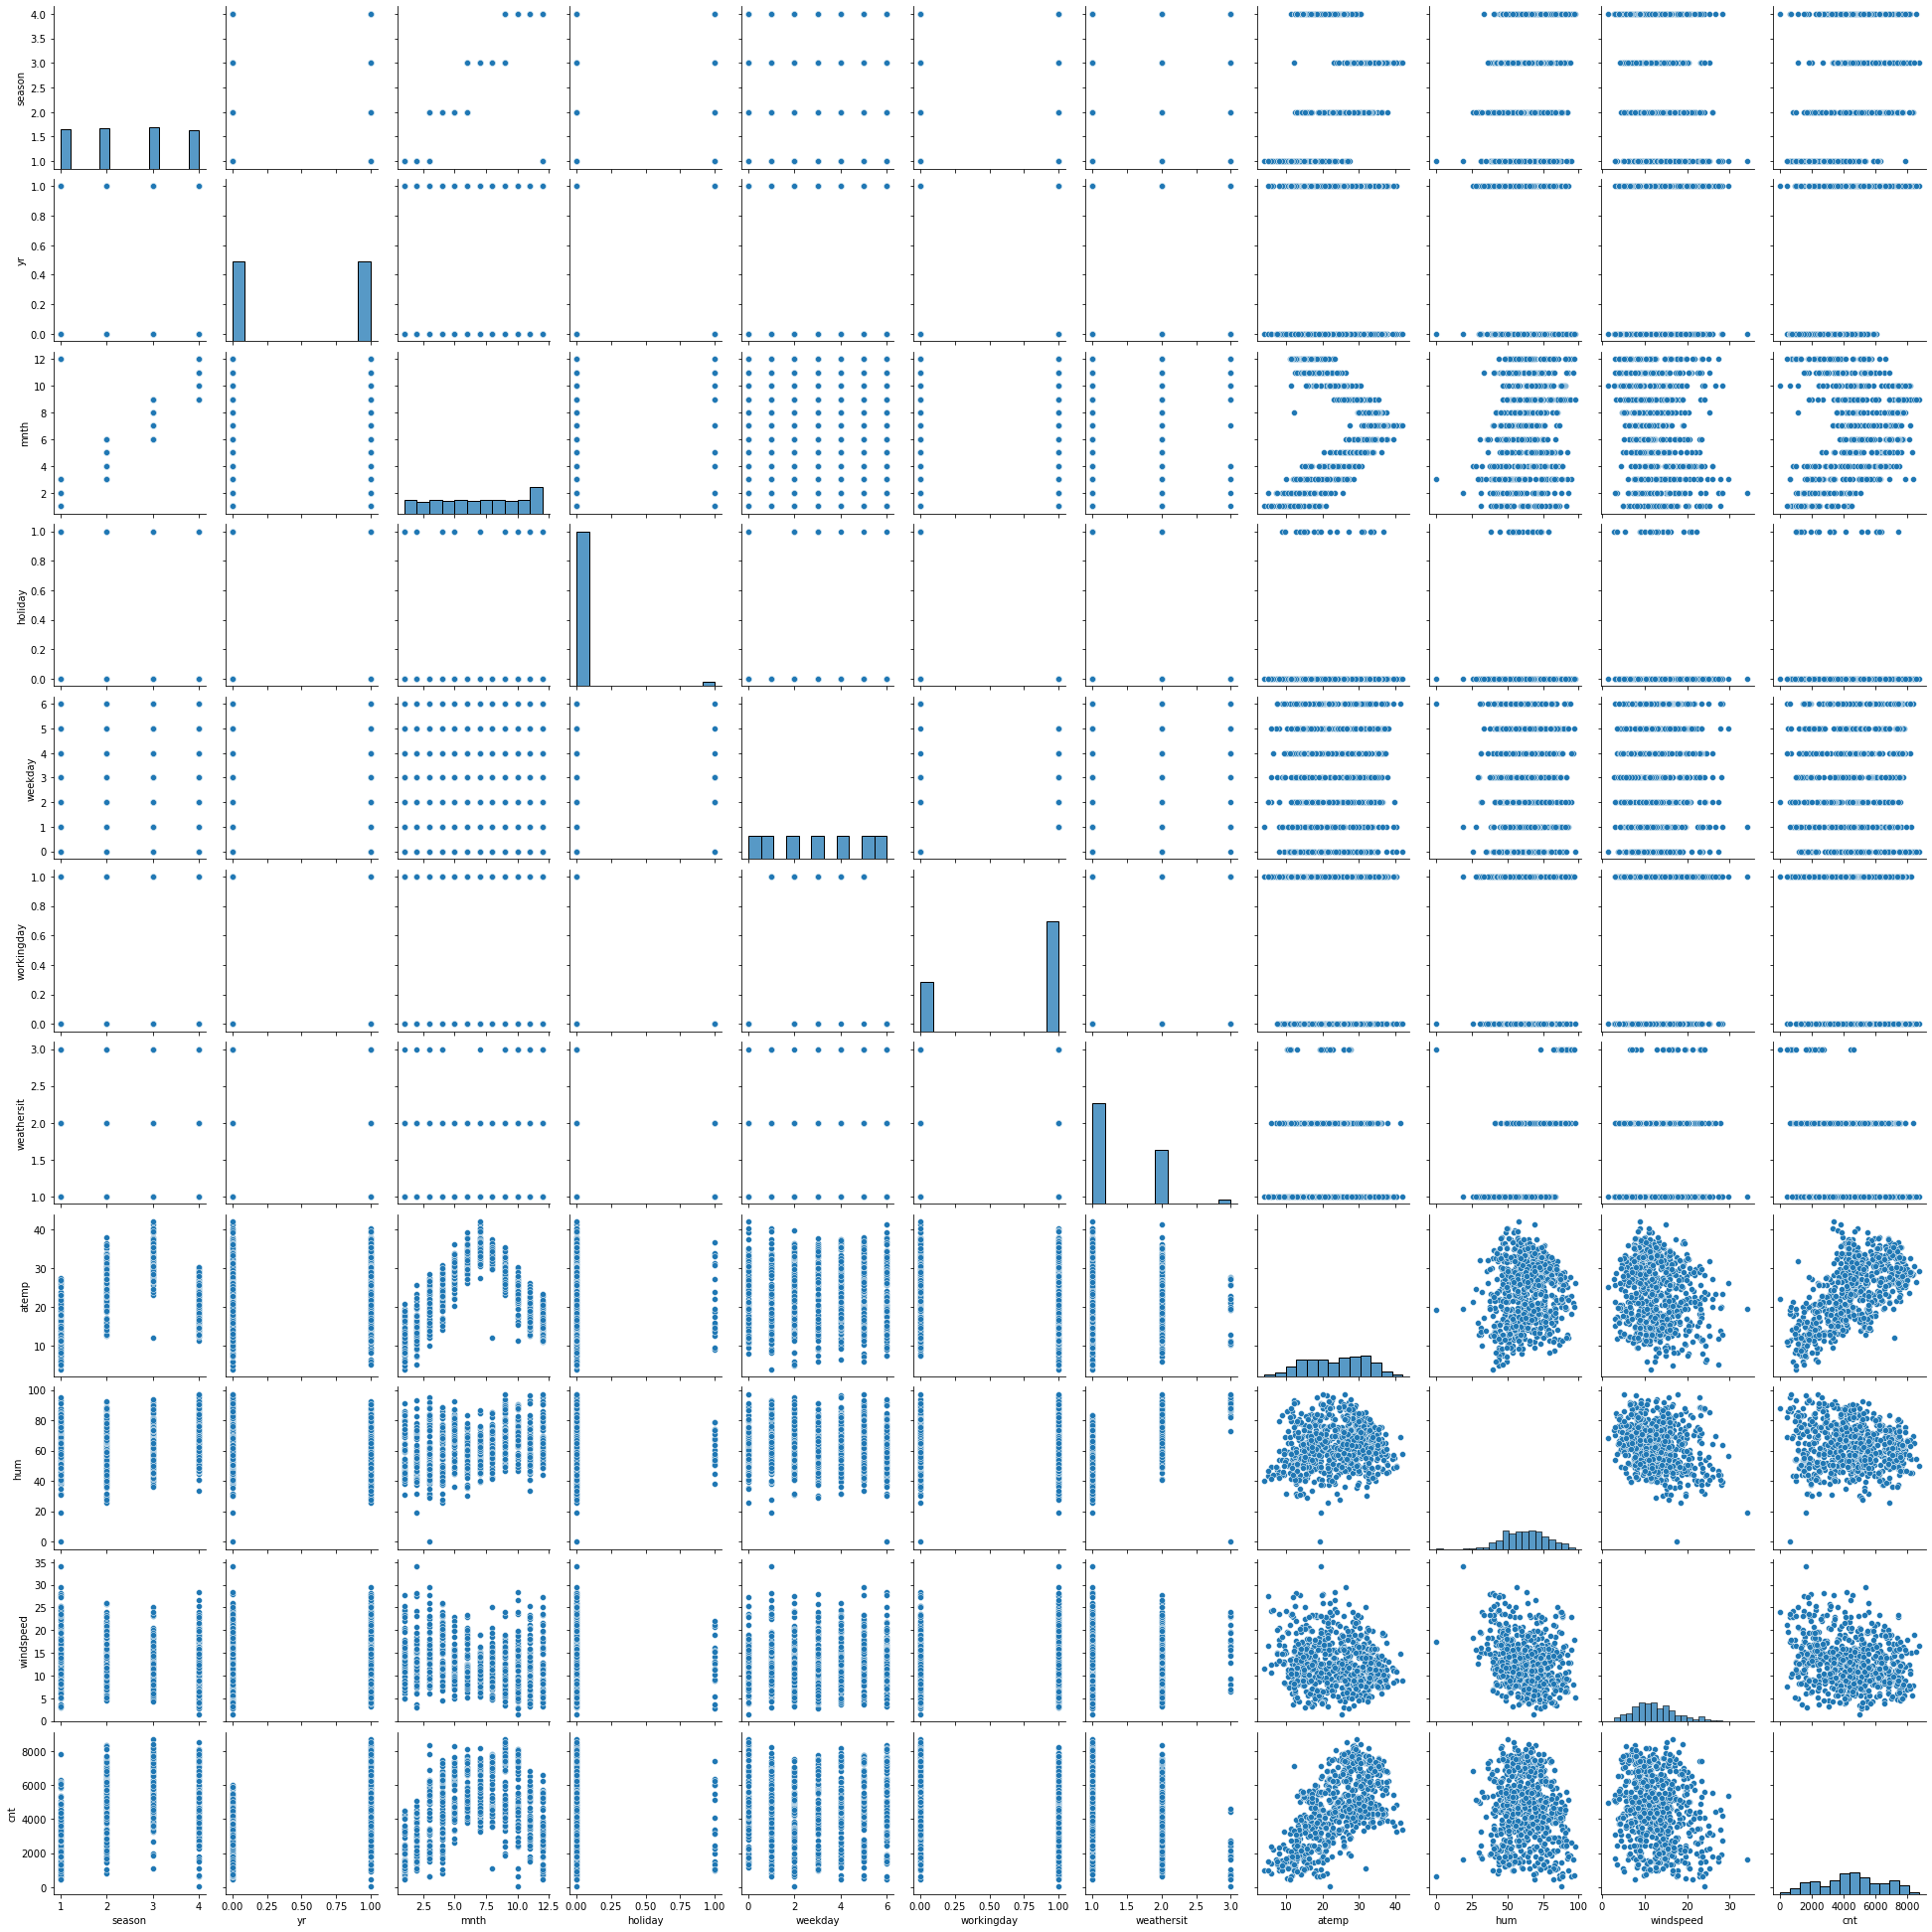

In [17]:
#Visualising all the remaining columns
sns.pairplot(data)

#### It can be seen that the columns atemp,hum and windspeed show some relationship with the target variable cnt

# Replacing the categorical variables in the data

In [18]:
#Replacing values in the season column
data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace=True)

In [19]:
#Checking the values in the season column
data.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [20]:
#Replacing the values in the month column
import calendar
data["mnth"] = data["mnth"].apply(lambda x:calendar.month_abbr[x])

In [21]:
#Checking the values in the month column
data["mnth"].value_counts()

May    62
Jan    62
Mar    62
Aug    62
Oct    62
Dec    62
Jul    62
Sep    60
Apr    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [22]:
#Replacing the values in the weathersit column
data.weathersit.replace({1:"Clear_Partly cloudy", 2:"Mist_cloudy", 3: "Light Snow_rain_thunderstorm"},inplace=True)

In [23]:
#Replacing the values in the year column
data.yr.replace({0:"2018", 1:"2019"},inplace=True)

In [24]:
#Replacing the values in the weekday column
data.weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)

In [25]:
#Checking the head of the data
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Wednesday,1,Clear_Partly cloudy,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Thursday,1,Clear_Partly cloudy,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Friday,1,Clear_Partly cloudy,11.46350,43.6957,12.522300,1600


In [26]:
#Checking the type of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 62.9+ KB


#### All variables are in the correct datatype and hence we can proceed with further analysis.

# Visualising numerical data

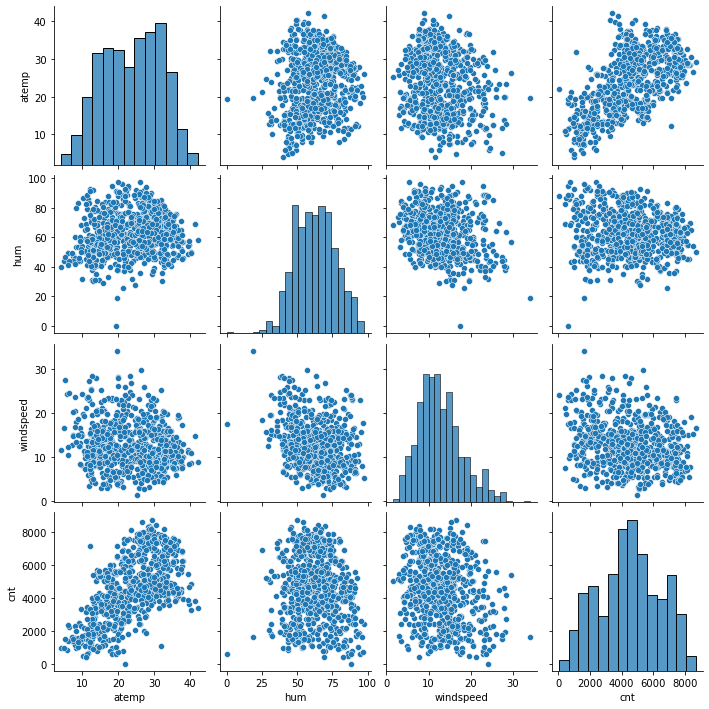

In [27]:
sns.pairplot(data,vars=["atemp","hum","windspeed","cnt"])

#### From the pairplot above it can be seen that the variable atemp has a linear relationship with the target variable.

# Visualising Categorical data

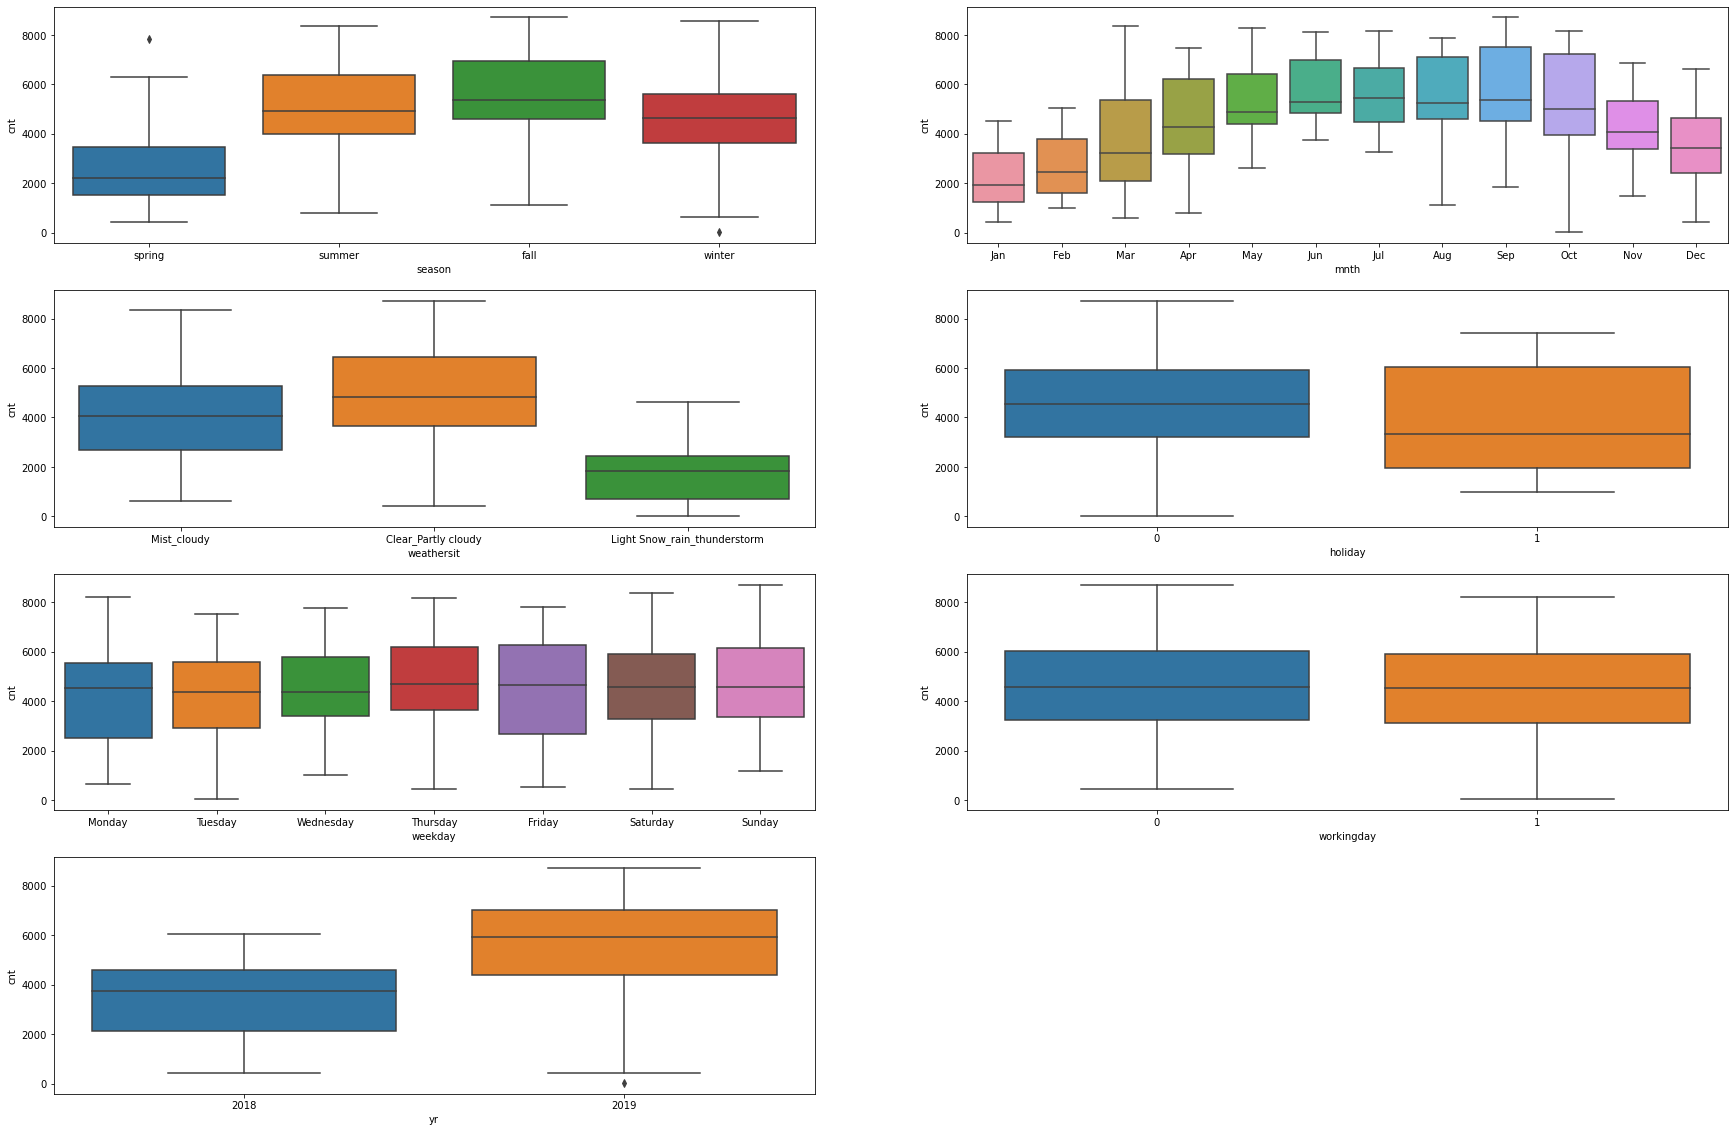

In [28]:
plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(4,2,7)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.show()

#### •	The demand for the bikes is highest during the fall season followed by the summer season.
#### •	When we look at the months, we can see there is a steady increase in the demand for bikes from the month of May to September.
#### •	Also, people choose to ride these bikes when the weather is clear or partly cloudy.
#### •	These three factors indicate that pleasant weather conditions majorly impact the rise in demand for the bikes. 
#### •	The demand for bikes is high during holidays. But during working days also there is almost the same considerable demand for these bikes which indicates that there may be a set of office going people who opt for these bikes on a regular basis.
#### •	Another important point which was inferred is that the demand has increased considerably in the year 2019 compared to 2018 which indicates that these bikes are gaining increasing popularity among the people.
#### •	Thus, pleasant weather and marketing which may have caused a surge in demand in the second year are major factors which impact the demand for these bikes.


# Creating dummy variables

In [29]:
#Assigning all categorical columns to dummy
dummy = data[["season","mnth","yr","weekday","weathersit"]]

In [30]:
#Creating dummy variables
dummy_data = pd.get_dummies(dummy,drop_first = True)

In [31]:
#Checking the dummy cariables created
dummy_data

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Sep,yr_2019,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow_rain_thunderstorm,weathersit_Mist_cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [32]:
#Adding the dummy variable columns to the other columns in the df
data_new = pd.concat([dummy_data,data],axis=1)

In [33]:
#Checking the head of the new dataframe
data_new.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,2018,Jan,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,2018,Jan,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,2018,Jan,0,Wednesday,1,Clear_Partly cloudy,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,2018,Jan,0,Thursday,1,Clear_Partly cloudy,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,2018,Jan,0,Friday,1,Clear_Partly cloudy,11.46350,43.6957,12.522300,1600


In [34]:
#Dropping columns for which dummy variables were created
data_new.drop(["season","mnth","yr","weekday","weathersit"],inplace=True,axis=1)

In [35]:
data_new.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow_rain_thunderstorm,weathersit_Mist_cloudy,holiday,workingday,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,11.46350,43.6957,12.522300,1600


# Dividing data into train and test sets

In [36]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

In [37]:
#Dividing the data into train and test data
train_data,test_data = train_test_split(data_new,train_size=0.7,test_size=0.3,random_state=100)

# Scaling the numerical variables

In [38]:
#Using minmax scaling
scaler = MinMaxScaler()

In [39]:
#Adding all the numerical variables to num_data
num_data = ["atemp","hum","windspeed","cnt"]

In [40]:
#Scaling the variables
train_data[num_data]=scaler.fit_transform(train_data[num_data])

In [41]:
#Checking the head of the train data
train_data.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow_rain_thunderstorm,weathersit_Mist_cloudy,holiday,workingday,atemp,hum,windspeed,cnt
653,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.501133,0.575354,0.300794,0.864243
576,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.391735,0.504508,0.188475,0.482973


In [42]:
#Checking the statistics of the train data
train_data.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow_rain_thunderstorm,weathersit_Mist_cloudy,holiday,workingday,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,...,0.152941,0.135294,0.029412,0.343137,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620
std,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,...,0.360284,0.342373,0.169124,0.475223,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### It can be seen that all the values lie in the range between 0 and 1

<AxesSubplot:>

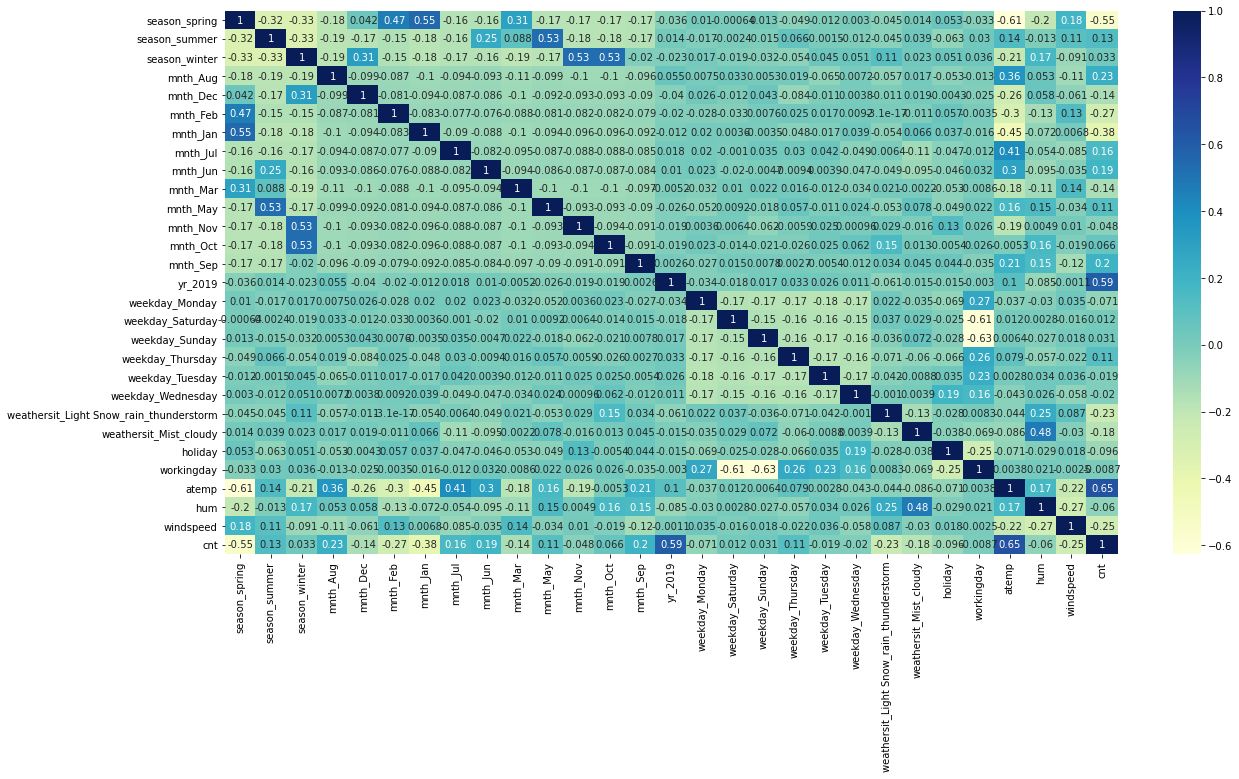

In [43]:
#Checking the correlation between the variables
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")

#### The variables yr_2019 and atemp have high correlation with the target variable

## Dividing into X and y sets for model building

In [44]:
#Dividing the train data into X and y
y_train = train_data.pop("cnt")
X_train = train_data

## Building the model using RFE

In [45]:
#Using rfe for feature selection with 14 variables
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,14)  
rfe = rfe.fit(X_train, y_train)

In [46]:
#Checking the RFE ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_spring', False, 6),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 11),
 ('mnth_Jun', False, 8),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('yr_2019', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 14),
 ('weekday_Tuesday', False, 9),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow_rain_thunderstorm', True, 1),
 ('weathersit_Mist_cloudy', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

#### It can be seen that the variables "atemp","hum","windspeed","yr","weathersit","seasons" and "months" are ranked as the best features which impact the demand by RFE.So we can build the model using these features.

### Building model using statsmodel, for the detailed statistics

In [47]:
#Putting the columns selected by rfe into sel_col
sel_col = X_train.columns[rfe.support_]
sel_col

Index(['season_summer', 'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Sep', 'yr_2019',
       'weathersit_Light Snow_rain_thunderstorm', 'weathersit_Mist_cloudy',
       'holiday', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [48]:
#Creating X_train
X_train_sel = X_train[sel_col]

In [49]:
#Adding the constant
X_train_sel = sm.add_constant(X_train_sel)

In [50]:
#Checking the head of the train data
X_train_sel.head()

,const,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Sep,yr_2019,weathersit_Light Snow_rain_thunderstorm,weathersit_Mist_cloudy,holiday,atemp,hum,windspeed
653,1.0,0,1,0,0,0,0,0,1,0,0,0,0.501133,0.575354,0.300794
576,1.0,0,0,0,0,0,0,0,1,0,0,0,0.766351,0.725633,0.264686
426,1.0,0,0,0,0,0,0,0,1,0,1,0,0.438975,0.640189,0.255342
728,1.0,0,0,0,1,0,0,0,1,0,0,0,0.200348,0.498067,0.663106
482,1.0,1,0,0,0,0,0,0,1,0,1,0,0.391735,0.504508,0.188475


In [51]:
#Fitting the model using ordinary least squares
lm = sm.OLS(y_train,X_train_sel).fit()

In [52]:
#Checking the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.6
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          1.29e-186
Time:                        14:35:20   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -981.6
Df Residuals:                     495   BIC:                            -918.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### It can be observed from the summary that tis model has an Rsquared value of 84% and Adjusted Rsquared value of 83.5% which implies that the model is good.The p-values for all the variables are not very high indicating that all these features are significant. Let us check the VIF to know if there are features which indicate multicollinearity.

In [53]:
#Importing the required library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
#Dropping the constant to calculate VIF
X_train_vif = X_train_sel.drop(["const"],axis=1)

In [55]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,hum,24.48
11,atemp,14.00
13,windspeed,3.84
1,season_winter,2.40
0,season_summer,2.26
9,weathersit_Mist_cloudy,2.22
7,yr_2019,2.06
5,mnth_Jan,1.88
2,mnth_Aug,1.60
4,mnth_Feb,1.52


#### From the results above it can be seen that the VIF for the "hum" and "atemp" variables are very high indicating that they are highly correlated with other variables.So we can drop one variable alone and construct the next model to check if the performance ids improving.

## Dropping the variable and updating the model

In [56]:
#Dropping "hum" variable and creating a new dataframe
X_train_new2 = X_train_vif.drop(["hum"],axis=1)

In [57]:
#Adding the constant and fitting the new model
X_train_new2 = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_new2).fit()

In [58]:
#Checking the summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.9
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          6.59e-184
Time:                        14:35:20   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -965.2
Df Residuals:                     496   BIC:                            -905.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### It can be seen that this model has an R-squared value of 83.4% and Adjusted R squared of 83% .There is only a slight decrease in the value which is quite insignificant.This inplie that the performance of the model is good.
#### We can also see that the p-values of all the features are low and hence all of them are of high significance

In [59]:
#Dropping constant to find VIF 
X_train_vif3 = X_train_new2.drop(["const"],axis=1)

In [60]:
#Calculating VIF
vif = pd.DataFrame()
X = X_train_vif3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,atemp,4.96
12,windspeed,3.75
7,yr_2019,2.06
0,season_summer,2.04
1,season_winter,1.79
2,mnth_Aug,1.59
9,weathersit_Mist_cloudy,1.57
6,mnth_Sep,1.33
5,mnth_Jan,1.28
4,mnth_Feb,1.26


#### It can observed from the table that all the features have a VIF value below 5.Hence there are no signs of multicollinearity between the variables and we can proceed further with this model.

In [61]:
#Predicting the values
y_train_cnt = lm.predict(X_train_new2)


# Residual Analysis

#### The following assumptions made on the error terms while applying multiple linear regression have to be validated.
- Error terms are normally distributed
- Error terms are independent of each other and have constant variance

Text(0.5, 0, 'Errors')

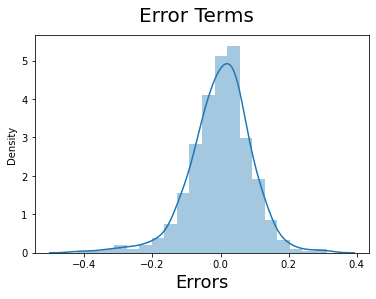

In [62]:
#Plotting thr residuals
fig = plt.figure()
sns.distplot((y_train-y_train_cnt),bins=20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)            

#### It can be seen that the error terms follow a normal distribution with mean centred around zero.Therefore this model satisfies this condition.

In [63]:
res = y_train-y_train_cnt

Text(0.5, 0, 'Predicted_values')

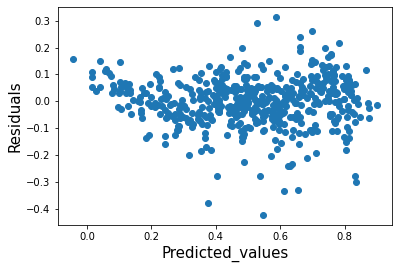

In [64]:
#Plotting residuals against fitted values
plt.scatter(y_train_cnt,res)
plt.ylabel('Residuals', fontsize = 15)
plt.xlabel('Predicted_values', fontsize = 15)            

#### From the graph it can be inferred that, the error terms are independent of each other and lie on the axis around zero.The second assumption is also verified and hence we can proceed furtherwith this model.

## Making the predictions

In [65]:
#Scaling the test data
test_data[num_data]=scaler.transform(test_data[num_data])

In [66]:
#Checking if all the variables are scaled
test_data.describe()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weekday_Tuesday,weekday_Wednesday,weathersit_Light Snow_rain_thunderstorm,weathersit_Mist_cloudy,holiday,workingday,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.255708,0.264840,0.232877,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,...,0.123288,0.155251,0.027397,0.319635,0.036530,0.639269,0.532991,0.638508,0.313350,0.520592
std,0.437258,0.442259,0.423633,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,...,0.329520,0.362974,0.163612,0.467403,0.188034,0.481313,0.217888,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300


In [67]:
#Creating X and y from test data
y_test = test_data.pop("cnt")
X_test = test_data

In [68]:
#Adding constant in the test data
X_test_1 = X_test[X_train_vif3.columns]
X_test_1 = sm.add_constant(X_test_1)

In [69]:
#Predicting values using test data
y_pred = lm.predict(X_test_1)

In [70]:
#Checking the r2score
r2_score(y_test,y_pred)

0.7990216143478708

#### Thus the value of r2score is 79.9% which indicates that the regression model fit is good

In [71]:
#Checking the error in the test data
mean_squared_error(y_test,y_pred)


0.009545630847287191

#### We can see that the error value is low and hence the accuracy of the predicted value is high

Text(0, 0.5, 'y_pred')

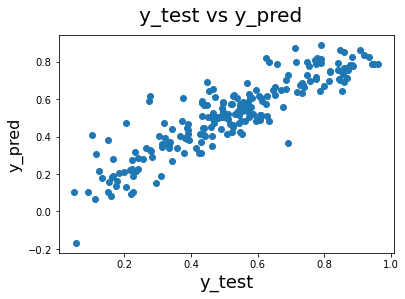

In [72]:
#Plotting y_test vs y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)        
plt.xlabel('y_test', fontsize=18)    
plt.ylabel('y_pred', fontsize=16) 

In [73]:
#Viewing the coefficients of the best fitted line.
lm.params.sort_values(ascending=False)

atemp                                      0.461364
yr_2019                                    0.234877
const                                      0.196730
season_winter                              0.110917
mnth_Sep                                   0.109737
season_summer                              0.076318
mnth_Aug                                   0.058708
mnth_Dec                                  -0.040775
mnth_Feb                                  -0.046983
mnth_Jan                                  -0.076698
weathersit_Mist_cloudy                    -0.082106
holiday                                   -0.092467
windspeed                                 -0.148578
weathersit_Light Snow_rain_thunderstorm   -0.283124
dtype: float64

#### Thus the equation of the best fitted line is,
cnt = 0.196730 +(0.461364 X atemp) +(0.234877 X yr) + (0.110917 X season_winter) + (0.109737 X mnth_Sep) + (0.076318 X season_summer) + (0.058708 X mnth_Aug) - (0.046983 X mnth_Feb) - (0.040775 X mnth_Dec) - (0.082106 X weathersit_Mist_cloudy_broken) - (0.092467 X holiday) - (0.076698 X mnth_Jan)-(0.148578 X windspeed) - (0.283124 X weathersit_Light_Snow_rain_thunderstorm)

Here the variables atemp, yr, season_winter, mnth_sep, season_summer and mnth_Aug have a positive impact on the demand whereas other variables have a negative impact.

## INFERENCE

#### The top three features which contribute significantly towards the demand of the bikes are:
- Feeling temperature(⁰C)-This feature represented as variable “atemp” in the model has the highest correlation with the target variable. This indicates that this variable has the highest impact on the demand of the bikes. Customers may not opt for these bikes on days having extremely high or low temperatures. Thus, temperature of a particular day plays an important role in deciding whether to ride a bike or not.
- Year_2019 – The model has been built on the data collected during two years 2018 and 2019.From the model,it can be clearly seen that the demand has significantlyincreased in the year 2019.This may indicate that more people are becoming aware of these bikes due to good marketing
- Weather situation- Good weather has a positive impact on the demand and extreme bad weather like thunderstorms have high negative impact on the demand.
#### Thus, good temperature, pleasant weather and good marketing are the main factors which positively impact the demand of the bikes.
